## - 불러올 패키지 목록

In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.formula.api import *
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# 통계적 추정과 검정

## 모평균에 대한 추정

In [2]:
df_csi = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Csi.csv' )
df_csi.head(5)

,ID,Index
0,1,75
1,2,63
2,3,49
3,4,86
4,5,53


count    25.00
mean     72.32
std      11.60
min      49.00
25%      63.00
50%      74.00
75%      80.00
max      95.00
Name: Index, dtype: float64



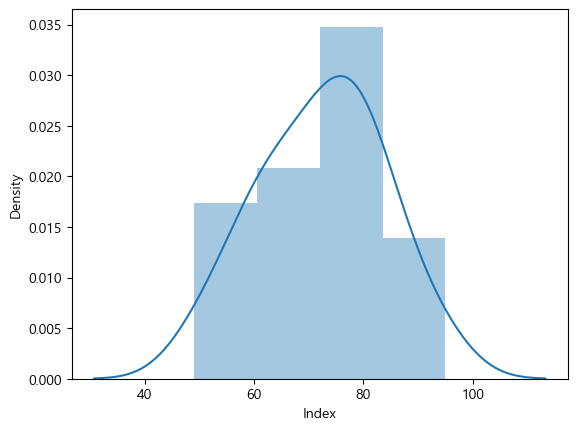

In [3]:
x = df_csi.Index

print( x.describe() )
print()

sb.distplot( x )
plt.show()
print()

### statsmodels 패키지 사용

- `statsmodels.stats.weightstats.DescrStatsW()` : 변수에 대한 기술통계량, 검정통계량, 모평균에 대한 신뢰구간 등이 저장된 리스트 객체 생성  
https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.html

- Method :  
`.tconfint_mean( alpha=0.05, alternative='two-sided' )`  
https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.tconfint_mean.html  
`.zconfint_mean( alpha=0.05, alternative='two-sided' )`   
https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.zconfint_mean.html

In [4]:
# 신뢰수준 1 - α = 0.95 (즉, 유의수준 α = 0.05) 일 때, 

# 표본 평균
print('표본 평균 : ', DescrStatsW(x).mean )
print()

# 표준 편차
print('표준편차 (df = n 인 경우) : ', DescrStatsW(x).std )
print()
print('표준편차 (df = n-1 인 경우) : ', DescrStatsW(x, ddof = 1).std ) # df = n - ddof
print()

# 신뢰 구간
print( '모평균에 대한 신뢰구간 (모분산이 알려지지 않은 경우) :\n',
       DescrStatsW(x).tconfint_mean() )
print()
print( '모평균에 대한 신뢰구간 (모분산이 알려진 경우) :\n',
       DescrStatsW(x).zconfint_mean() )
print()

표본 평균 :  72.32

표준편차 (df = n 인 경우) :  11.365632406513948

표준편차 (df = n-1 인 경우) :  11.600000000000001

모평균에 대한 신뢰구간 (모분산이 알려지지 않은 경우) :
 (67.53175533702299, 77.108244662977)

모평균에 대한 신뢰구간 (모분산이 알려진 경우) :
 (67.77288355586707, 76.86711644413292)



### Numpy 및 SciPy 패키지 사용

- 표본 크기 n: `.size()`

- 평균 : `numpy.mean()`

- 표준편차:  
`numpy.std( a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value> )`  
https://numpy.org/doc/stable/reference/generated/numpy.std.html

- 스튜던트 t 연속 확률 변수 :  
`scipy.stats.t`  
Method :  
`.ppf( q, df, loc=0, scale=1 )`  
`.cdf( x, df, loc=0, scale=1 )`  
`.interval( alpha, df, loc=0, scale=1 )`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [5]:
# n
n = x.size
print('n =', n )
print()

# 표본평균
mean = np.mean(x)
print('표본 평균 : ', mean )
print()

# 표준편차
print('표준편차 (df = n 인 경우) : ', np.std(x) )
print('표준편차 (df = n-1 인 경우) : ', np.std(x, ddof = 1) )  # df = n - ddof
print()

# 표준오차 ( s / n^(1/2) )
sd = np.std(x, ddof=1) / np.sqrt(n)  # df = n - ddof
print('표준오차 (df = n-1 인 경우) : ', sd )  
print()

n = 25

표본 평균 :  72.32

표준편차 (df = n 인 경우) :  11.365632406513948
표준편차 (df = n-1 인 경우) :  11.600000000000001

표준오차 (df = n-1 인 경우) :  2.3200000000000003



In [6]:
# 신뢰구간 구하기(1)

print( '신뢰구간 :',
       stats.t.interval( 1 - 0.05,  # 1 - α
                        n-1,  # df
                        loc = mean,  # 구간의 중심
                        scale = sd) )  # 표준오차
print()

신뢰구간 : (67.53175533702299, 77.108244662977)



In [7]:
# 신뢰구간 구하기(2)

# 상/하한을 계산하여 신뢰구간을 구함.
# α = 0.05 일 때, 좌/우측이 각각 0.025 이므로

limit = stats.t.ppf( 1 - 0.05/2, n-1) * sd  # ( 1 - α, df )

print('limit_upper =', limit )  
print()

limit_lower = stats.t.ppf( 0.05/2, n-1) * sd  # ( α, df )

print('limit_lower =', limit_lower, '(= -limit_upper)' )  
print()

# 신뢰 구간
print('신뢰구간 :', mean - limit,'~', mean + limit)
print()

limit_upper = 4.788244662977008

limit_lower = -4.788244662977009 (= -limit_upper)

신뢰구간 : 67.53175533702299 ~ 77.108244662977



## 모비율에 대한 추정

### statsmodels 패키지 사용

- `statsmodels.stats.proportion.proportion_confint( count, nobs, alpha=0.05, method='normal' )`  
https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportion_confint.html

#### 모비율에 대한 신뢰구간(이항분포)

In [8]:
n = 400
x = 250

print( "표본비율: p =", x/n )
print()  

# x가 이항분포를 따른다고 가정할 때 : method = 'beta'

print( "모비율에 대한 신뢰구간(이항비율) : ",
       proportion_confint( x, n, alpha = 0.05, method = 'beta') )
print()

표본비율: p = 0.625

모비율에 대한 신뢰구간(이항비율) :  (0.5755217886614248, 0.67261376127048)



#### 모비율에 대한 신뢰구간(정규근사)

In [9]:
n = 400
x = 250

print( "표본비율: p =", x/n )
print()  

# x가 정규분포를 따른다고 가정할 때 : method = 'normal' (기본값)

print( '모비율에 대한 신뢰구간(정규근사) :',
       proportion_confint( x, n, alpha = 0.05, method = 'normal') )
print()

표본비율: p = 0.625

모비율에 대한 신뢰구간(정규근사) : (0.5775568258044377, 0.6724431741955623)



### SciPy 패키지 사용 (정규근사)

- 정규 연속확률변수 :  
`scipy.stats.norm`  
Method :  
`.ppf( q, df, loc=0, scale=1 )`  
`.cdf( x, df, loc=0, scale=1 )`  
`.interval( alpha, df, loc=0, scale=1 )`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [10]:
n = 400
x = 250
p = x/n

print( "표본비율: p =", x/n )
print()
print( '모비율에 대한 신뢰구간(정규근사) :',
       stats.norm.interval( 0.95,  # 1 - α
                            p,
                            scale = np.sqrt( p*(1-p)/n ) ) )  # 표준오차
print()

표본비율: p = 0.625

모비율에 대한 신뢰구간(정규근사) : (0.5775568258044378, 0.6724431741955622)



In [11]:
# 다음과 같이 계산해도 동일한 결과가 출력된다

print( p + stats.norm.ppf(0.025) * np.sqrt( p*(1-p)/n ),
       p + stats.norm.ppf(0.975) * np.sqrt( p*(1-p)/n ) )

0.5775568258044377 0.6724431741955622


## 모분산과 모표준편차에 대한 추정

In [12]:
df_csi = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Csi.csv' )
x = df_csi.Index

### 베이지안 신뢰구간  

- `scipy.stats.bayes_mvs( data, alpha=0.9 )`  
Returns : `mean_cntr`, `var_cntr`, `std_cntr`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html  

In [13]:
mean_x, var_x, std_x = stats.bayes_mvs( x,
                                        0.95 )  # 1 - α


print( '평균의 신뢰구간 :\n', mean_x)
print()
print( '분산의 신뢰구간 :\n', var_x)
print()
print( '표준편차의 신뢰구간 :\n', std_x)
print()

평균의 신뢰구간 :
 Mean(statistic=72.32, minmax=(67.53175533702299, 77.108244662977))

분산의 신뢰구간 :
 Variance(statistic=146.79272727272726, minmax=(82.04028250979714, 260.41455376108695))

표준편차의 신뢰구간 :
 Std_dev(statistic=11.978951328828686, minmax=(9.057609094556748, 16.137365143079798))



# t-검정 수행 전, 표본의 정규성 확인

- t-검정 수행 단계

(0-1) 정규성 검정  
(0-2) 등분산 검정 (두 모집단에 대한 독립표본 t-test 일 경우)  
.  
(1) 가설 설정  
(2) 유의수준 설정  
(3) 검정통계량의 값 및 유의확률 계산  
(4) 귀무가설의 기각여부 판단 및 의사결정

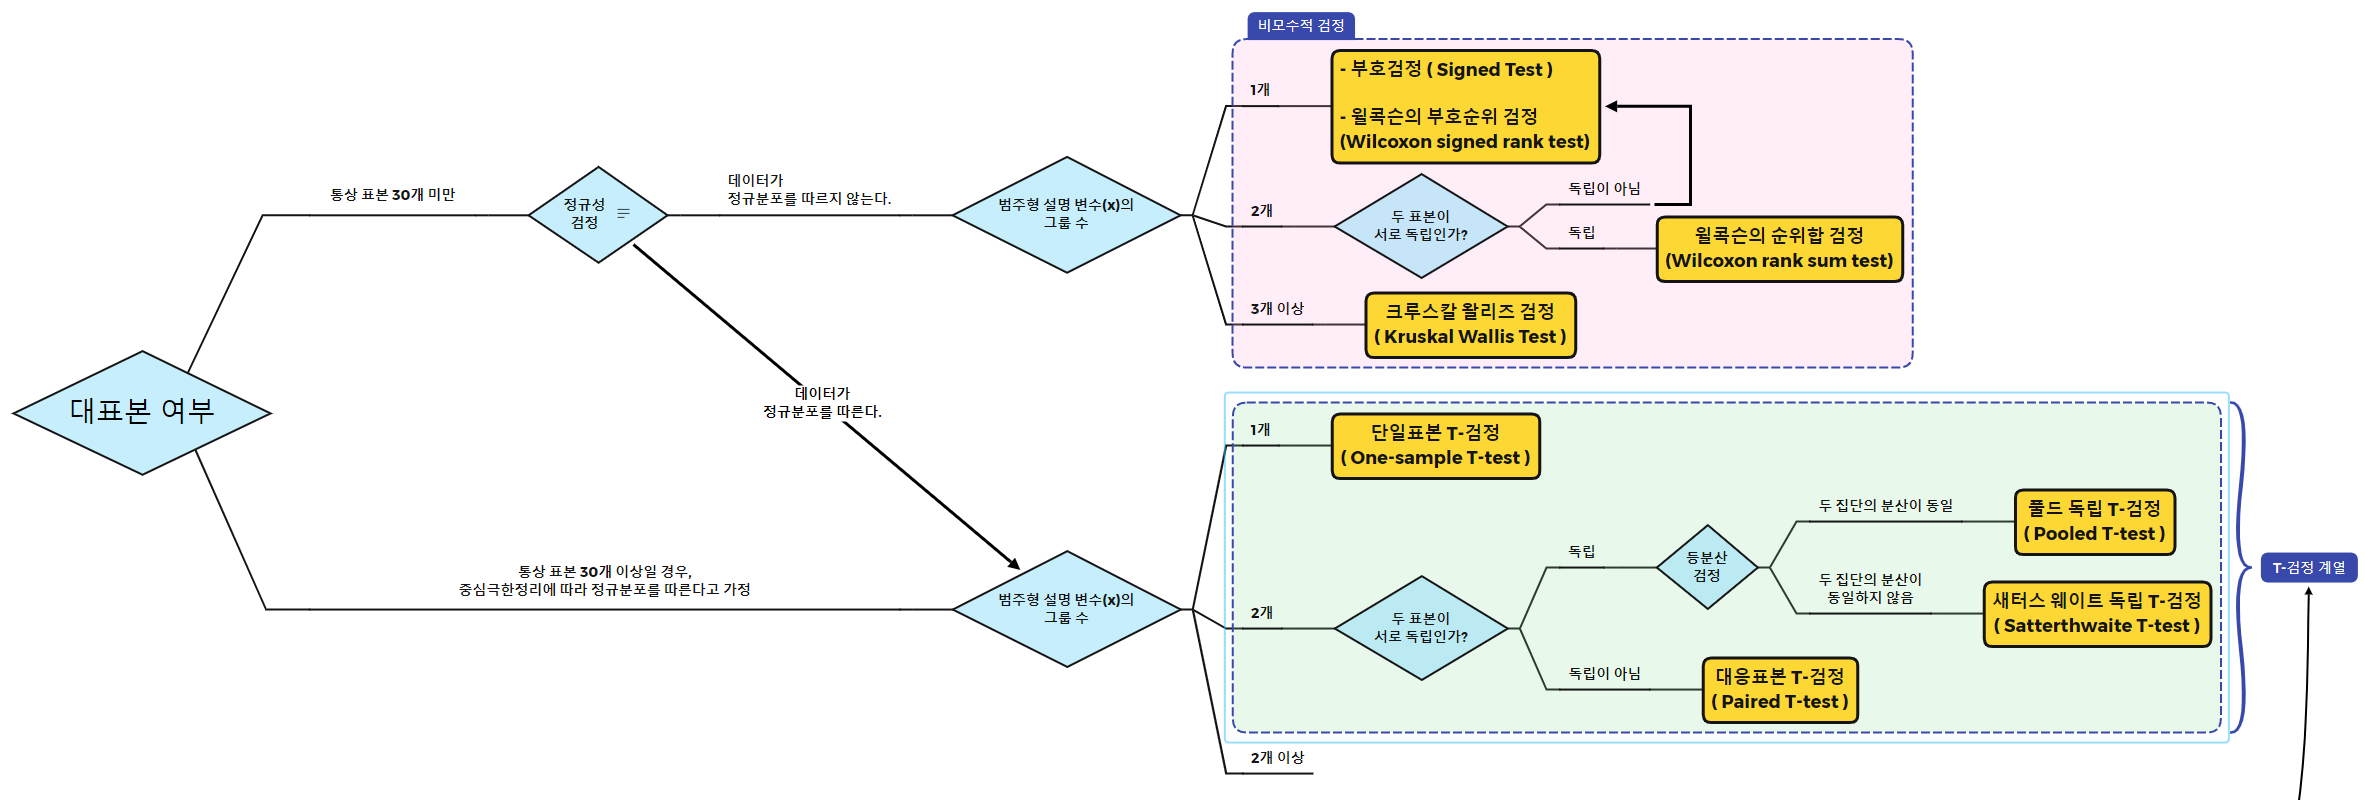

## 정규성 검정

- 귀무가설(H0) : 데이터가 정규분포를 따른다.

- 대립가설(H1) : 데이터가 정규분포를 따르지 않는다.

In [14]:
# 데이터프레임 생성
df_cats = pd.read_csv('C:/Users/Boanerges/GitHub/TIL/rawdata/cats.csv',
                       index_col = 'Unnamed: 0')

df_cats

,Sex,Bwt,Hwt
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3
...,...,...,...
140,M,3.7,11.0
141,M,3.8,14.8
142,M,3.8,16.8
143,M,3.9,14.4


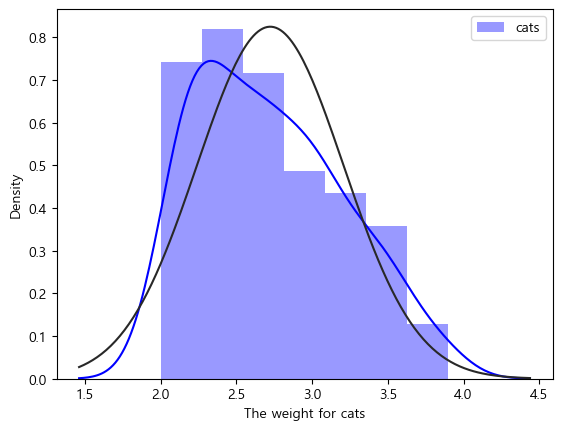

In [15]:
# kde(Kerner Density Estimation): 구해진 히스토그램을 정규화한 뒤 확률밀도함수로 사용

ax = sb.distplot( df_cats['Bwt'],
                  kde = True,    # 가우스 커널 밀도 추정값을 그릴지 여부
                  fit = stats.norm,    # 랜덤 변수 객체
                  label = "cats",
                  color = 'blue')

ax.set(xlabel = "The weight for cats")

plt.legend()
plt.show()

### n < 5000 일 경우

#### Shapiro-Wilk normality test

- 자료 값들과 표준정규점수와의 선형상관 관계를 측정하여 검정하는 방법

- `scipy.stats.shapiro( x )`  
Returns : 'statistic', '.pvalue'  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [16]:
# Shapiro-Wilk normality test (n < 5000 일 경우)

result = stats.shapiro( df_cats['Bwt'] )

print( f' Statistics: {result[0]:.4f} \n P-value: {result[1]:.28f}' )

if result[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 데이터가 정규분포를 따르지 않는다.")
if result[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 데이터가 정규분포를 따른다.")
print()

 Statistics: 0.9519 
 P-value: 0.0000673024842399172484874725
 p-value < 0.05 이므로 귀무가설 기각. 데이터가 정규분포를 따르지 않는다.



### n ≥ 5000 일 경우

#### Anderson-Darling normality test

- `scipy.stats.anderson( x, dist='norm' )`  
Returns : `.statistic`, `.critical_values`, `.significance_level`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html

In [17]:
# Anderson-Darling normality test (n ≥ 5000 일 경우)

result = stats.anderson( df_cats['Bwt'], dist='norm' )

print( ' Statistics:', result.statistic.round(4), '\n',
       'critical values:', result.critical_values, '\n',
       'significance level:', result.significance_level )
print()

 Statistics: 1.9228 
 critical values: [0.561 0.639 0.767 0.894 1.064] 
 significance level: [15.  10.   5.   2.5  1. ]



#### Kolmogorov-Smirnov test

- 자료의 가장 작은 값부터 가장 큰 값까지의 누적상대빈도가 이론적 정규분포에서의 누적상대빈도와 얼마나 다른가를 측정하여 검정하는 방법

- `scipy.stats.kstest( rvs, cdf, args=(), N=20, alternative='two-sided', mode='auto' )`  
Returns : `statistic`, `pvalue`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [18]:
# statsmodels.stats.diagnostic.kstest_normal( x,
#                                             dist = 'norm',    # 가정된 분포
#                                             pvalmethod = 'table')  # 검정 통계량의 p-값을 계산하는데 사용되는 방법

result = kstest_normal(df_cats['Bwt'])
print( f' Statistics: {result[0]:.4f} \n P-value: {result[1]:.28f}' )

if result[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 데이터가 정규분포를 따르지 않는다.")
if result[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 데이터가 정규분포를 따른다.")
print()

 Statistics: 0.1017 
 P-value: 0.0022497993974595915239733657
 p-value < 0.05 이므로 귀무가설 기각. 데이터가 정규분포를 따르지 않는다.



### Q-Q plot

((array([-2.58977345, -2.26833208, -2.08397164, -1.95134078, -1.84615093,
         -1.75813779, -1.68195358, -1.61444188, -1.55357684, -1.49797725,
         -1.44665728, -1.39888755, -1.35411252, -1.31189888, -1.27190175,
         -1.23384196, -1.19749012, -1.16265539, -1.12917712, -1.09691879,
         -1.06576327, -1.03560932, -1.00636876, -0.97796428, -0.95032771,
         -0.92339857, -0.89712296, -0.87145259, -0.84634402, -0.82175802,
         -0.797659  , -0.77401457, -0.75079515, -0.72797364, -0.70552513,
         -0.68342667, -0.66165704, -0.64019656, -0.61902697, -0.59813124,
         -0.57749349, -0.55709882, -0.53693331, -0.51698381, -0.49723799,
         -0.47768418, -0.45831134, -0.43910901, -0.42006725, -0.40117661,
         -0.38242807, -0.36381301, -0.34532319, -0.32695068, -0.30868788,
         -0.29052747, -0.27246238, -0.25448578, -0.23659106, -0.21877178,
         -0.2010217 , -0.18333474, -0.16570495, -0.14812651, -0.13059373,
         -0.11310101, -0.09564283, -0.

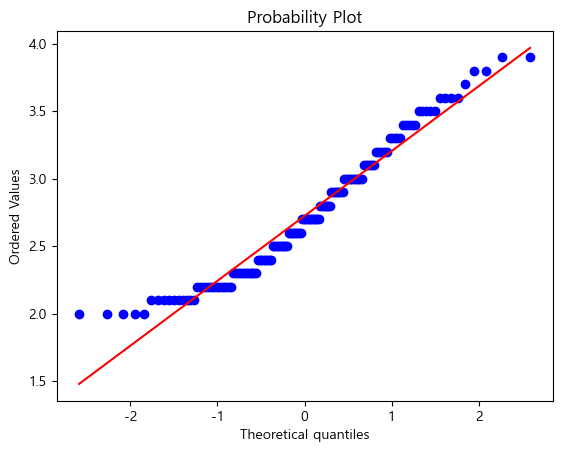

In [19]:
# Q-Q plot
stats.probplot( df_cats['Bwt'], plot = plt )

# ===============================

# 단일 모집단에 대한 검정

## 모평균에 대한 검정 (일표본 t-검정)

< 가설 설정 - T-검정 >

- 귀무가설(H0) : μ0 = 70

- 대립가설(H1) : μ0 > 70

- α = 0.05
- 

< 검정 기준 >

- 검정통계량의 값이 기각역에 포함됨 = p값이 유의수준 α 보다 작음. --> 귀무가설 기각

- 검정통계량의 값이 기각역을 벗어남 = p값이 유의수준 α 보다 큼  --> 귀무가설 채택

In [20]:
df_csi = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Csi.csv' )
x = df_csi.Index
print()

### 일표본 t-검정 : 표본이 정규분포를 따르는 경우

- `scipy.stats.ttest_1samp( a, popmean, axis=0, nan_policy='propagate', alternative='two-sided' )`  
Returns : `statistic`, `pvalue`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

- 스튜던트 t 연속 확률 변수 :  
`scipy.stats.t`  
Method :  
`.ppf( q, df, loc=0, scale=1 )`  
`.cdf( x, df, loc=0, scale=1 )`  
`.interval( alpha, df, loc=0, scale=1 )`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [21]:
# scipy.stats.ttest_1samp( a,  # 검정을 수행할 대상 (배열)
#                          popmean,  # 귀무가설의 기대값.
#                          axis = 0,  # a 배열에서 검정을 수행할 축 지정. 기본값은 0
#                                     # axis = None 이면 전체 배열을 계산
#                          nan_policy = 'propagate',  # 입력된 데이터에 NaN 값이 포함된 경우의 처리 방법. 기본값은 ‘propagate’
#                                                     # ‘propagate’ : NaN 을 반환한다.
#                                                     # ‘raise’: 에러를 발생시킨다.
#                                                     # ‘omit’: NaN 값을 무시하고 계산 수행
#                          alternative = 'two-sided' )  # 양측/단측 검정 설정. 기본값은 ‘two-sided’
#                                                       # 양측검정은 ‘two-sided’
#                                                       # 단측검정은 ‘less’ 또는 ‘greater’

In [22]:
# 일표본 t-검정 (우측 단측검정)
# 대립가설은 '모평균이 70 이상이다' 이므로 우측 단측검정 수행

stat, pval = stats.ttest_1samp( x, popmean = 70,
                               alternative = 'greater')  # 우측 단측검정

print( '검정통계량 :', stat )
print()
print( '기각치 :', stats.t.ppf(0.95, n-1) )  # 우측 단측검정이므로 0.95 = 1 - α 입력
print()                                       
print( 'p-value :', pval )
print()

검정통계량 : 0.9999999999999971

기각치 : 1.6486815335554057

p-value : 0.16364344063989328



In [23]:
# 일표본 t-검정 (양측 검정일 경우)
stat, pval = stats.ttest_1samp( x, popmean = 70 )  # 양측 검정

print( '검정통계량 :', stat )
print()
print( '기각치 :', stats.t.ppf(0.975, n-1) )  # 0.975 = 1 - α/2
print()                                       # α = 0.05 일 때, 좌/우측이 각각 0.025 이므로
print( 'p-value :', pval )
print()

검정통계량 : 0.9999999999999971

기각치 : 1.965927295920809

p-value : 0.32728688127978656



### 윌콕슨의 부호순위 검정 : 표본이 정규분포를 따르지 않는 경우

- 윌콕슨의 부호순위 검정 (Wilcoxon signed rank test)  
`scipy.stats.wilcoxon( x, y=None, zero_method='wilcox', correction=False, alternative='two-sided', mode='auto' )`  
Returns : `.statistic`, `.pval`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [24]:
# 윌콕슨의 부호순위 검정 (Wilcoxon signed rank test)

# scipy.stats.wilcoxon( x,  # 첫 번째 측정 집합. 1차원이어야 한다.
#                           # 1-sample wilcoxon test일 경우 'x - 예상치' 입력
#                       y = None,  # 두번째 측정값 집합. 1차원이어야 한다. 기본값은 None
#                       zero_method = 'wilcox',  # 기본값은 'wilcox'
#                                                # " Wilcox ": 기본값인 모든 0차를 버립니다.
#                                                # "pratt": 순위 결정 과정에서 0차를 포함하지만 0의 순위를 떨어뜨립니다.
#                                                # "zsplit": 순위 프로세스에 0차를 포함하고 0 순위를 양수와 음수 사이에 나눕니다.
#                       correction = False,  # 기본값은 False.
#                                            # True 로 설정하면, 정규 근사가 사용되는 경우 z-통계량을 계산할 때 
#                                             평균값을 향해 Wilcoxon 순위 통계량을 0.5 조정하여 연속성 수정을 적용한다.
#                       alternative = 'two-sided',  # 양측/단측 검정 설정. 기본값은 ‘two-sided’
#                                                   # 양측검정은 ‘two-sided’
#                                                   # 단측검정은 ‘less’ 또는 ‘greater’
#                       mode = 'auto' )  # p-값을 계산하는 데 사용되는 분포를 정의. 기본값은 'auto'
#                                        # 'auto' : 옵션들 중 하나를 선택
#                                        # 'exact' : 검정 통계량의 정확한 분포를 사용
#                                        # 'approx' : 단측 확률의 두 배인 양측 확률을 근사
#                                        # 'asymp': 검정 통계량의 점근 분포를 사용

wilcoxon_signed_rank = stats.wilcoxon( x - 70,  # 1-sample wilcoxon test일 경우 'x - 예상치' 입력
                                       alternative = 'greater')

print( f' V-value(1-sample Wilcoxon result): {wilcoxon_signed_rank[0]:.4f} \n P-value: {wilcoxon_signed_rank[1]:.28f}' )


if wilcoxon_signed_rank[1] >= 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 모평균은 70보다 크지 않다.")
if wilcoxon_signed_rank[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 모평균은 70보다 크다.")
print()

 V-value(1-sample Wilcoxon result): 183.0000 
 P-value: 0.1726552952421226971857493027
 p-value > 0.05 이므로 귀무가설 채택. 모평균은 70보다 크지 않다.



## 모비율에 대한 검정

< 가설 설정 - T-검정 >

- 귀무가설(H0) : 현재 불량률이 기존 불량률 0.15 와 같다

- 대립가설(H1) : 현재 불량률이 기존 불량률 0.15 보다 작다.

- α = 0.05
- 

< 검정 기준 >

- 검정통계량의 값이 기각역에 포함됨 = p값이 유의수준 α 보다 작음. --> 귀무가설 기각

- 검정통계량의 값이 기각역을 벗어남 = p값이 유의수준 α 보다 큼  --> 귀무가설 채택

### 이항비율 검정

- 성공확률에 대한 가설검정 :  

  `scipy.stats.binomtest( k, n, p=0.5, alternative='two-sided' )`  
Returns : `k`, `n`, `alternative`, `proportion_estimate`, `pvalue`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binomtest.html

  `scipy.stats.binom_test`  
Return : `pvalue`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html

In [25]:
n = 400
x = 54

stats.binomtest( k = x, n = n, p = 0.15, alternative = 'less')

BinomTestResult(k=54, n=400, alternative='less', proportion_estimate=0.135, pvalue=0.2225806768647776)

In [26]:
n = 400
x = 54

print('모비율 추정치 =', x/n )  # 모비율 추정치
print()
print( 'p-value =', stats.binom_test( x, n = 400,
                                      p = 0.15,   # 가정 비율 (기존 불량률) = 0.15
                                      alternative = 'less') )
print()

모비율 추정치 = 0.135

p-value = 0.2225806768647776



### 정규근사 검정  

- 정규근사를 기반으로 한 비율 검정:  
`statsmodels.stats.proportion.proportions_ztest( count, nobs, value=None, alternative='two-sided', prop_var=False )`  
Returns :  
`zstats`, `p-value`  
https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html 

- 정규 연속확률변수 :  
`scipy.stats.norm`  
Method :  
`.ppf( q, df, loc=0, scale=1 )`  
`.cdf( x, df, loc=0, scale=1 )`  
`.interval( alpha, df, loc=0, scale=1 )`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [27]:
# α = 0.05

n = 400
x = 54

# 정규근사 검정
stat, pval = proportions_ztest( x, n,
                                value = 0.15, # 기존 불량률은 15%
                                alternative = 'smaller')

print( '검정통계량 :', stat )
print()
print( '기각치 :', stats.norm.ppf(0.05) )
print()
print( 'p-value :', pval )
print()


# stats.norm.cdf(stat) 의 결과도 p값과 같다

검정통계량 : -0.8779025626122934

기각치 : -1.6448536269514729

p-value : 0.18999829920624411



## 모분산에 대한 검정

< 가설 설정 - T-검정 >

- 귀무가설(H0) : 새 측정기구의 분산이 기존 측정기구의 분산 0.09 와 같다.

- 대립가설(H1) : 새 측정기구의 분산이 기존 측정기구의 분산 0.09 보다 작다.

- α = 0.05
- 

< 검정 기준 >

- 검정통계량의 값이 기각역에 포함됨 = p값이 유의수준 α 보다 작음. --> 귀무가설 기각

- 검정통계량의 값이 기각역을 벗어남 = p값이 유의수준 α 보다 큼  --> 귀무가설 채택

In [28]:
imp = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Impurities.csv')
imp.head()

,ID,Volume
0,1,3.6
1,2,3.4
2,3,3.6
3,4,3.7
4,5,3.3


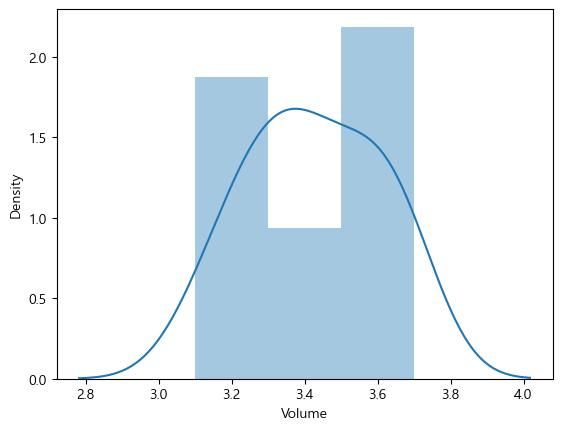

In [29]:
data = imp.Volume

sb.distplot(data)
plt.show()

### 카이제곱 검정통계량 사용

- 카이제곱 연속확률변수 :  
`scipy.stats.chi2`  
Method :  
`.ppf( q, df, loc=0, scale=1 )`  
`.cdf( x, df, loc=0, scale=1 )`  
`.interval( alpha, df, loc=0, scale=1 )`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

In [30]:
# 표본 크기
n = data.size

# 귀무가설 하에서의 분산
sigmas2 = 0.09  

# 표본분산
s2 = np.var(data, ddof = 1)  # df = n - ddof

# 카이제곱 검정통계량
Chi2 = (n-1)*s2 / sigmas2

# 모분산에 대한 검정
print( '검정통계량 :', (n-1)*s2 / sigmas2 )
print()
print( '기각치 :', stats.chi2.ppf(0.05, n-1) )  # 좌측 검정이므로 α = 0.05 입력
print()
print( 'p-value :', stats.chi2.cdf(Chi2, n-1) )  # 단측 검정의 p-value = P( X < Chi2 )
print()

검정통계량 : 5.66666666666667

기각치 : 7.2609439276700325

p-value : 0.015180452235944669



# 두 모집단에 대한 비교

## 모분산의 동일성에 대한 검정 (등분산 검정)

- 독립표본 t-검정 시행 전에 확인해야 할 과정  

- 귀무가설(H0) : 두 집단의 분산이 동일하다.
- 대립가설(H1) : 두 집단의 분산이 동일하지 않다.

In [31]:
df_reading = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Reading.csv',
                          index_col = 'ID')
df_reading

,Group,Score
ID,,
1,New,75
2,New,80
3,New,72
4,New,77
5,New,69
6,New,81
7,New,71
8,New,78
9,Old,65


In [32]:
# 그룹 나누기
new = df_reading[ df_reading.Group == 'New' ]
old = df_reading[ df_reading.Group == 'Old' ]

### Scipy 패키지 사용
- 등분산에 대한 Bartlett 검정  
`scipy.stats.bartlett( *args )`  
Returns : `statistic`, `pvalue`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html

- 등분산에 대한 Levene 검정  
`scipy.stats.levene( *args, center='median', proportiontocut=0.05 )`  
Returns : `statistic`, `pvalue`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

- 등분산에 대한 Fligner-Killeen 검정  
`scipy.stats.fligner( *args, center='median', proportiontocut=0.05 )`  
Returns : `statistic`, `pvalue`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html

#### Bartlett's Test

In [33]:
# scipy.stats.bartlett( sample1, sample2,… )

bartlett_test = stats.bartlett( new.Score, old.Score )

print( f" Statistic(Bartlett's test): {bartlett_test[0]:.3f} \n P-value: {bartlett_test[1]:.12f} " )

if bartlett_test[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 등분산성을 만족하지 않는다.")
if bartlett_test[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 등분산성을 만족한다.")
print()

 Statistic(Bartlett's test): 0.030 
 P-value: 0.862265990826 
 p-value > 0.05 이므로 귀무가설 채택. 등분산성을 만족한다.



#### Levene's Test

In [34]:
# scipy.stats.levene( sample1, sample2,…,
#                     center = 'median',    # 검정에 사용할 통계값의 종류. 'mean’, ‘median’, ‘trimmed’
#                                           # 기본값은 ‘median’.
#                     proportiontocut = 0.05 )    # center 옵션에 ‘trimmed’ 을 지정할 경우. 데이터의 각 끝으로부터 잘라내는 지점의 비율을 지정.
#                                                 # 기본값은 0.05.

levene_test = stats.levene( new.Score, old.Score )

print( f" Statistic(Levene's Test): {levene_test[0]:.3f} \n P-value: {levene_test[1]:.12f} " )

if levene_test[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 등분산성을 만족하지 않는다.")
if levene_test[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 등분산성을 만족한다.")
print()

 Statistic(Levene's Test): 0.198 
 P-value: 0.663237624072 
 p-value > 0.05 이므로 귀무가설 채택. 등분산성을 만족한다.



#### Fligner’s Test

In [35]:
# scipy.stats.fligner( sample1, sample2,…,
#                      center = 'median',    # 검정에 사용할 통계값의 종류. 'mean’, ‘median’, ‘trimmed’
#                                            # 기본값은 ‘median’.
#                      proportiontocut = 0.05 )    # center 옵션에 ‘trimmed’ 을 지정할 경우. 데이터의 각 끝으로부터 잘라내는 지점의 비율을 지정.
#                                                  # 기본값은 0.05.

fligner_test = stats.fligner( new.Score, old.Score )

print( f" Statistic(Fligner’s Test): {fligner_test[0]:.3f} \n P-value: {fligner_test[1]:.12f} " )

if fligner_test[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 등분산성을 만족하지 않는다.")
if fligner_test[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 등분산성을 만족한다.")
print()

 Statistic(Fligner’s Test): 0.169 
 P-value: 0.681235234433 
 p-value > 0.05 이므로 귀무가설 채택. 등분산성을 만족한다.



### F-test 함수를 직접 생성하여 사용

In [36]:
def F_test(x, y):
    f = np.var(x, ddof = 1) / np.var(y, ddof = 1)
    df1 = x.size -1
    df2 = y.size -1
    p = 2*(1-stats.f.cdf(f, df1, df2))
    return f, p

test_result = F_test( new.Score, old.Score )

print( f" Statistic(F-test): {test_result[0]:.3f} \n P-value: {test_result[1]:.12f} " )

 Statistic(F-test): 1.145 
 P-value: 0.862413807137 


## 독립표본

### 두 모평균의 비교 (독립표본)

In [37]:
df_reading = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Reading.csv',
                          index_col = 'ID')
df_reading.head()

,Group,Score
ID,,
1,New,75
2,New,80
3,New,72
4,New,77
5,New,69


In [38]:
x = df_reading.Group
y = df_reading.Score

           Score
count  16.000000
mean   72.250000
std     5.208967
min    63.000000
25%    68.750000
50%    71.500000
75%    76.250000
max    81.000000 

        Group
count     16
unique     2
top      New
freq       8


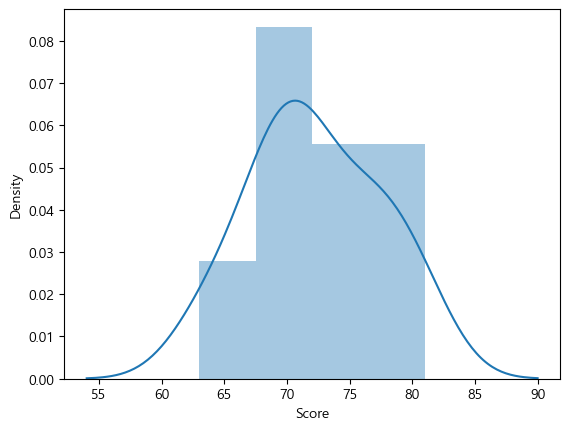

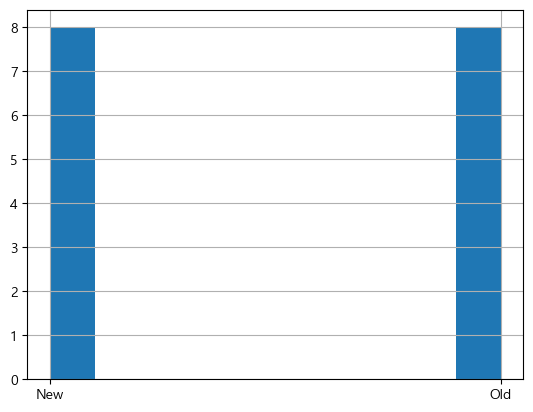

In [39]:
print( df_reading.describe(), '\n\n',
       df_reading.describe( exclude = 'number' ) )

sb.distplot(df_reading.Score)
plt.show()
df_reading['Group'].hist()
plt.show()

      Score                                                  
      count    mean       std   min    25%   50%    75%   max
Group                                                        
New     8.0  75.375  4.373214  69.0  71.75  76.0  78.50  81.0
Old     8.0  69.125  4.086126  63.0  67.25  69.0  71.25  76.0



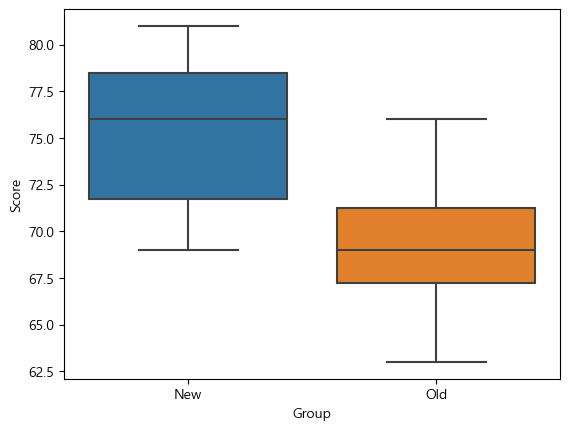

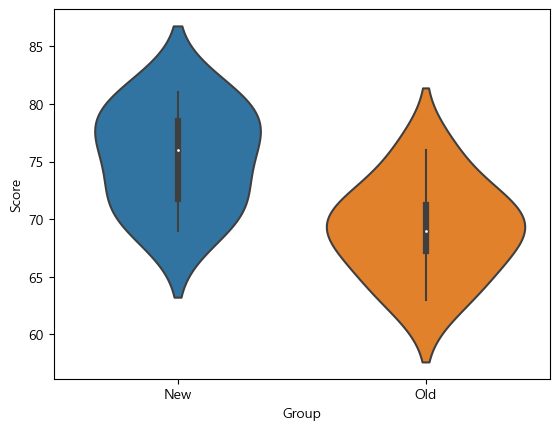

In [40]:
print( df_reading.groupby('Group').describe() )
print()

sb.boxplot( x, y )
plt.show()
sb.violinplot( x, y )
plt.show()

In [41]:
df_reading = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Reading.csv',
                          index_col = 'ID')
df_reading.head()

,Group,Score
ID,,
1,New,75
2,New,80
3,New,72
4,New,77
5,New,69


In [42]:
# 그룹 나누기
new = df_reading[ df_reading.Group == 'New' ]
old = df_reading[ df_reading.Group == 'Old' ]
print()

#### 독립표본 t-검정 : 표본이 정규분포를 따르며 등분산일 경우

- 독립표본 t-검정의 경우 사전에 두 표본의 분산이 동일한지에 대한 등분산 검정이 수행되어야 함.

- 등분산을 만족하지 않는다면 '웰치-새터스웨이트 t-검정(Welch-Satterthwaite t-test)을 수행

##### statsmodels 패키지 사용

- `statsmodels.stats.weightstats.ttest_ind( x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0 )`  
Returns : `tstat`, `pvalue`, `df`  
https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html

In [43]:
# 독립표본 t-검정 (양측 검정)

stat, pval, df = ttest_ind( new.Score, old.Score,
                            alternative = 'two-sided',
                            usevar = 'pooled' )  # 등분산 가정(두 모집단이 같다는 가정)

print( '검정통계량 :', stat )
print( 'p-value :', pval )
print( 'Degree of Freedom :', df )
print()

검정통계량 : 2.9536127902039953
p-value : 0.010470744188033123
Degree of Freedom : 14.0



##### SciPy 패키지 사용
- `scipy.stats.ttest_ind( a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0 )`  
Returns : `statistic`, `pvalue`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [44]:
# 독립표본 t-검정 (양측 검정)
stat, pval = stats.ttest_ind( new.Score, old.Score,
                              equal_var = True )  # 등분산 가정(두 모집단이 같다는 가정)

print( '검정통계량 :', stat )
print( 'p-value :', pval )
print()

검정통계량 : 2.9536127902039953
p-value : 0.010470744188033123



#### 웰치-새터스웨이트 t-검정 : 표본이 정규분포를 따르지만 등분산이 아닐 경우

##### statsmodels 패키지 사용

- 독립표본 t-검정에서 사용하는 `scipy.stats.ttest_ind()` 함수를 사용하되 `usevar = 'unequal'` 옵션을 적용한다.

- 웰치-새터스웨이트 t-검정(Welch-Satterthwaite t-test)  
`statsmodels.stats.weightstats.ttest_ind( x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0 )`  
Returns : `tstat`, `pvalue`, `df`  
https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html

In [45]:
# 독립표본 t-검정 (양측 검정)

stat, pval, df = ttest_ind( new.Score, old.Score,
                            alternative = 'two-sided',
                            usevar = 'unequal' )  # 이분산 가정(두 모집단이 다르다는 가정)

print( '검정통계량 :', stat )
print( 'p-value :', pval )
print( 'Degree of Freedom :', df )
print()

검정통계량 : 2.9536127902039953
p-value : 0.010513377253950486
Degree of Freedom : 13.935945095796395



##### SciPy 패키지 사용

- 독립표본 t-검정에서 사용하는 `scipy.stats.ttest_ind()` 함수를 사용하되 `equal_var = False` 옵션을 적용한다.

- 웰치-새터스웨이트 t-검정(Welch-Satterthwaite t-test)  
`scipy.stats.ttest_ind( a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0 )`  
Returns : `statistic`, `pvalue`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [46]:
# 독립표본 t-검정 (양측검정)
stat, pval = stats.ttest_ind( new.Score, old.Score,
                              equal_var = False )  # 이분산 가정(두 모집단이 다르다는 가정)

print( '검정통계량 :', stat )
print( 'p-value :', pval )
print()

검정통계량 : 2.9536127902039953
p-value : 0.01051337725395049



#### 윌콕슨의 순위합 검정 : 표본이 정규분포를 따르지 않는 경우

- 독립인 두 집단의 평균이 같은지 비교하는 독립표본 t-test의 비모수 방법

- 윌콕슨의 순위합 검정 (Wilcoxon rank sum test)  
`scipy.stats.ranksums( x, y, alternative='two-sided' )`  
Returns : `statistic`, `pvalue`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html?highlight=ranksums#scipy.stats.ranksums

In [47]:
# 윌콕슨의 순위합 검정 (Wilcoxon rank sum test)

stat, pval = stats.wilcoxon( new.Score, old.Score )

print( '검정통계량 :', stat )
print( 'p-value :', pval )
print()

검정통계량 : 4.5
p-value : 0.078125



### 두 모비율의 비교 (독립표본)

In [48]:
df_support = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Support.csv',
                          index_col = 'ID')
df_support

,Gender,YesNo
ID,,
1,Male,No
2,Female,Yes
3,Female,No
4,Female,No
5,Female,No
...,...,...
446,Male,No
447,Male,No
448,Female,Yes


In [49]:
df_support.describe()

,Gender,YesNo
count,450,450
unique,2,2
top,Male,No
freq,250,236


In [50]:
df_support.groupby('Gender').describe()

YesNo                 
       count unique  top freq
Gender                       
Female   200      2  Yes  104
Male     250      2   No  140

#### 교차표 작성

- `pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)`  
https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [51]:
# 교차표

cm_support = pd.crosstab( index = df_support.Gender,
                          columns = df_support.YesNo )

cm_support

YesNo,No,Yes
Gender,,
Female,96,104
Male,140,110


In [52]:
# 교차표 (margins 옵션 적용)

cm_margins = pd.crosstab( index = df_support.Gender,
                          columns = df_support.YesNo,
                          margins = True )

cm_margins

YesNo,No,Yes,All
Gender,,,
Female,96,104,200
Male,140,110,250
All,236,214,450


In [53]:
# 교차표 ( 모든 데이터에 대해 정규화한 결과 )

cm_norm_all = pd.crosstab( index = df_support.Gender,
                           columns = df_support.YesNo,
                           normalize = 'all' )

cm_norm_all

YesNo,No,Yes
Gender,,
Female,0.213333,0.231111
Male,0.311111,0.244444


In [54]:
# 교차표 ( 각각의 열에 대해서 정규화 한 결과 )

cm_norm_column = pd.crosstab( index = df_support.Gender,
                        columns = df_support.YesNo,
                        normalize = 'columns' )

cm_norm_column

YesNo,No,Yes
Gender,,
Female,0.40678,0.485981
Male,0.59322,0.514019


In [55]:
# 교차표 ( 각각의 행에 대해서 정규화 한 결과 )

cm_norm_index = pd.crosstab( index = df_support.Gender,
                        columns = df_support.YesNo,
                        normalize = 'index' )

cm_norm_index

YesNo,No,Yes
Gender,,
Female,0.48,0.52
Male,0.56,0.44


#### 카이제곱 검정 (정규근사 검정)

- 표준정규분포를 따르는 확률변수 z의 제곱은 자유도가 1인 카이제곱분포를 따르므로 카이제곱 검정을 이용하여 정규근사 검정을 수행할 수 있다.

- 교차표에서의 변수들 간의 카이제곱 검정  
`scipy.stats.chi2_contingency( observed, correction=True, lambda_=None )`  
Returns : `chi2`, `p`, `dof`, `expected`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [56]:
chi2, pval, df, expected = stats.chi2_contingency( cm_support )

print( '카이제곱 검정통계량 :', chi2,
       '\np-value :', p,
       '\n자유도 :', df,
       '\n기대도수 :', '\n', expected, '\n')

카이제곱 검정통계량 : 2.5395141968952935 
p-value : 0.625 
자유도 : 1 
기대도수 : 
 [[104.88888889  95.11111111]
 [131.11111111 118.88888889]] 



In [57]:
chi2, pval, df, expected = stats.chi2_contingency( cm_margins )

print( '카이제곱 검정통계량 :', chi2,
       '\np-value :', p,
       '\n자유도 :', df,
       '\n기대도수 :', '\n', expected, '\n')

카이제곱 검정통계량 : 2.8512593061935667 
p-value : 0.625 
자유도 : 4 
기대도수 : 
 [[104.88888889  95.11111111 200.        ]
 [131.11111111 118.88888889 250.        ]
 [236.         214.         450.        ]] 



#### 피셔의 정확성 검정
- `scipy.stats.fisher_exact( table, alternative='two-sided' )`  
Returns : `oddsratio`, `p_value`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html

In [58]:
pf = 104/200
pm =  (250-140)/250

odds_ratio, pval = stats.fisher_exact( cm_support, alternative = 'two-sided')

print('남성 유권자의 지지율 :', pm)
print('여성 유권자의 지지율 :', pf)
print()
print('오즈비 :', odds_ratio )
print()
print('p-value :', pval )
print()

남성 유권자의 지지율 : 0.44
여성 유권자의 지지율 : 0.52

오즈비 : 0.7252747252747253

p-value : 0.10634531219760412



## 대응표본

### 두 모평균의 비교 (대응표본)

In [59]:
df_paired = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Paired.csv',
                          index_col = 'ID')
df_paired

,Pretest,Posttest
ID,,
1,80,82
2,73,71
3,70,95
4,60,69
5,88,100
6,84,71
7,65,75
8,37,60
9,91,95


In [60]:
x1 = df_paired.Pretest
x2 = df_paired.Posttest

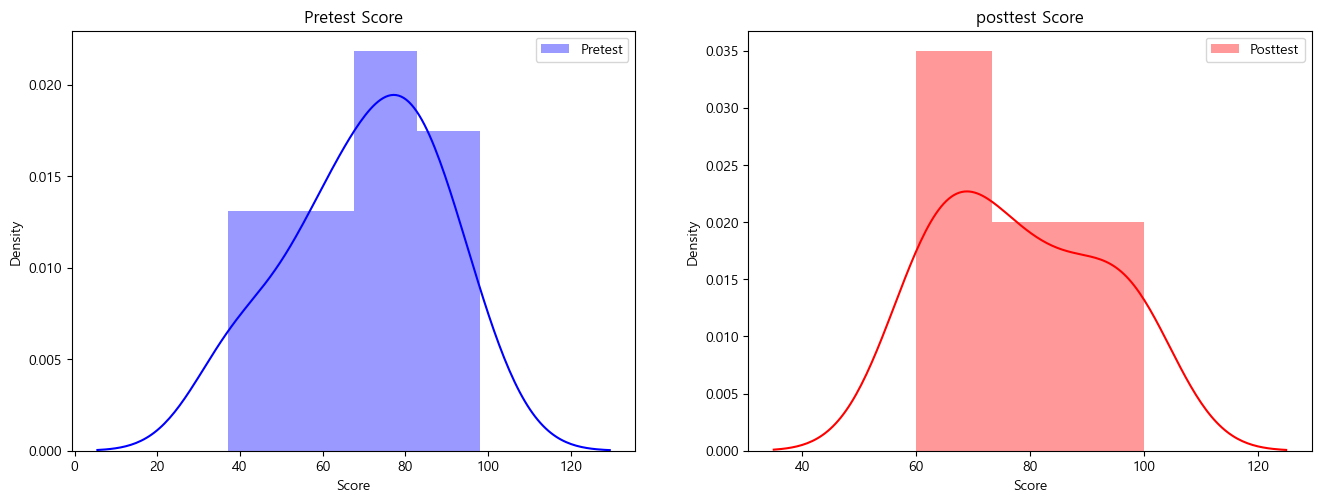

In [61]:
plt.figure(figsize=(16,12))

ax1 = plt.subplot(221)
ax1 = sb.distplot( x1, label="Pretest", color = 'blue')
ax1.set( xlabel = "Score", title = "Pretest Score")
plt.legend()

ax2 = plt.subplot(222)
ax2 = sb.distplot( x2, label="Posttest", color = 'red')
ax2.set( xlabel = "Score", title = "posttest Score")
plt.legend()

plt.show()

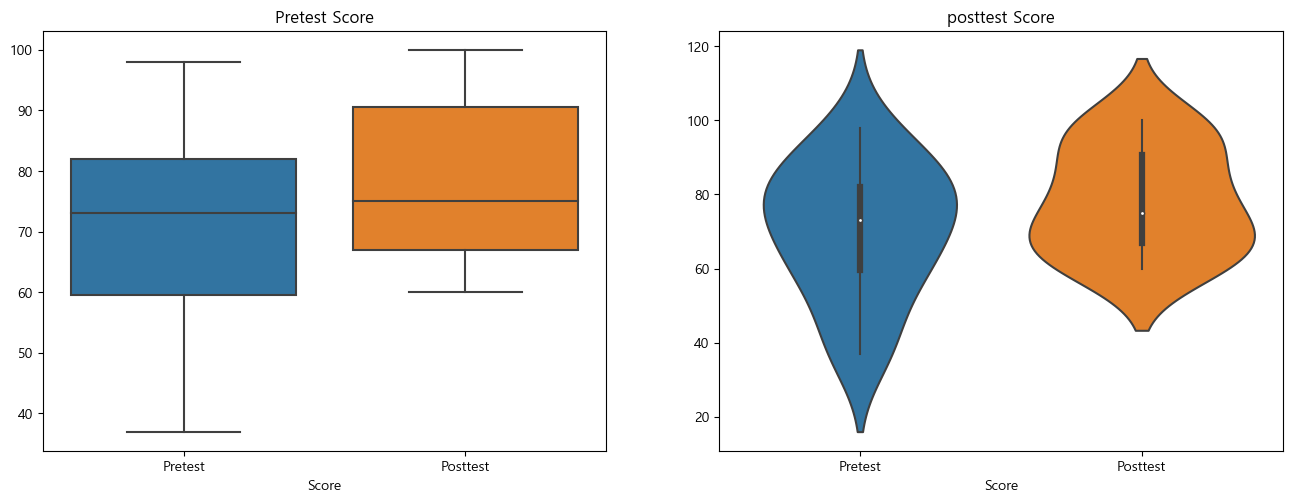

In [62]:
plt.figure(figsize=(16,12))

ax1 = plt.subplot(221)
ax1 = sb.boxplot( data = df_paired.iloc[:, 0:2] )
ax1.set( xlabel = "Score", title = "Pretest Score")

ax2 = plt.subplot(222)
ax2 = sb.violinplot( data = df_paired.iloc[:, 0:2] )
ax2.set( xlabel = "Score", title = "posttest Score")

plt.show()

count    15.000000
mean      7.933333
std       9.931671
min     -13.000000
25%       2.500000
50%       7.000000
75%      12.500000
max      25.000000
Name: Diff, dtype: float64 



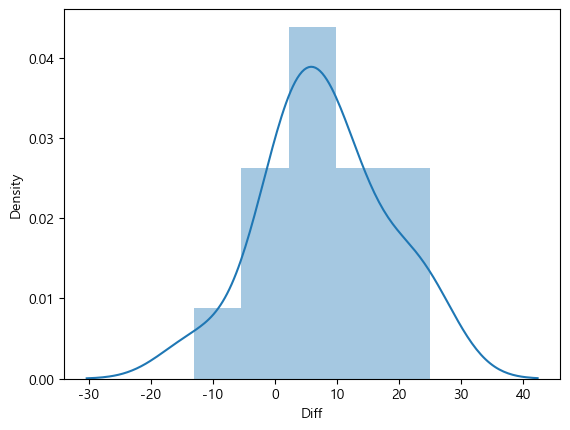

In [63]:
df_paired['Diff'] = df_paired.Posttest - df_paired.Pretest

print( df_paired.Diff.describe(), '\n')

sb.distplot( df_paired['Diff'] )
plt.show()

#### 대응표본 t-검정 : 표본이 정규분포를 따르는 경우
- 대응표본 t-test  
`scipy.stats.ttest_rel( a, b, axis=0, nan_policy='propagate', alternative='two-sided' )`  
Returns : `statistic`, `pvalue`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [64]:
# H0: μ(x1) = μ(x2)

stat, pval = stats.ttest_rel( x1, x2 )
print( '< 양측 검정 >\n\n',
       '검정통계량 :', stat, '\n',
       'p-value :', pval, '\n' )

< 양측 검정 >

 검정통계량 : -3.093705670004429 
 p-value : 0.007930923229026533 



In [65]:
# H0: μ(x1) ≤ μ(x2)
# H1: μ(x1) > μ(x2)
# 귀무가설, 대립가설에 따른 alternative 옵션 선택에 주의!!!!!!

stat, pval = stats.ttest_rel( x1, x2, alternative = 'greater' )
print( '< 우측 단측검정 >\n\n',
       '검정통계량 :', stat, '\n',
       'p-value :', pval, '\n' )

< 우측 단측검정 >

 검정통계량 : -3.093705670004429 
 p-value : 0.9960345383854867 



In [66]:
# H0: μ(x1) ≥ μ(x2)
# H1: μ(x1) < μ(x2)
# 귀무가설, 대립가설에 따른 alternative 옵션 선택에 주의!!!!!!

stat, pval = stats.ttest_rel( x1, x2, alternative = 'less' )
print( '< 좌측 단측검정 >\n\n',
       '검정통계량 :', stat, '\n',
       'p-value :', pval, '\n' )

< 좌측 단측검정 >

 검정통계량 : -3.093705670004429 
 p-value : 0.003965461614513267 



#### 윌콕슨의 부호순위 검정 : 표본이 정규분포를 따르지 않는 경우

-  대응된 두 자료의 차이의 평균이 0인지 비교하는 대응표본 t-test의 비모수 방법

- 윌콕슨의 부호순위 검정 (Wilcoxon signed rank test)  
`scipy.stats.wilcoxon( x, y=None, zero_method='wilcox', correction=False, alternative='two-sided', mode='auto' )`  
Returns : `.statistic`, `.pval`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [67]:
# 윌콕슨의 부호순위 검정 (Wilcoxon signed rank test)

# scipy.stats.wilcoxon( x,  # 첫 번째 측정 집합. 1차원이어야 한다.
#                           # 1-sample wilcoxon test일 경우 'x - 예상치' 입력
#                       y = None,  # 두번째 측정값 집합. 1차원이어야 한다. 기본값은 None
#                       zero_method = 'wilcox',  # 기본값은 'wilcox'
#                                                # " Wilcox ": 기본값인 모든 0차를 버립니다.
#                                                # "pratt": 순위 결정 과정에서 0차를 포함하지만 0의 순위를 떨어뜨립니다.
#                                                # "zsplit": 순위 프로세스에 0차를 포함하고 0 순위를 양수와 음수 사이에 나눕니다.
#                       correction = False,  # 기본값은 False.
#                                            # True 로 설정하면, 정규 근사가 사용되는 경우 z-통계량을 계산할 때 
#                                             평균값을 향해 Wilcoxon 순위 통계량을 0.5 조정하여 연속성 수정을 적용한다.
#                       alternative = 'two-sided',  # 양측/단측 검정 설정. 기본값은 ‘two-sided’
#                                                   # 양측검정은 ‘two-sided’
#                                                   # 단측검정은 ‘less’ 또는 ‘greater’
#                       mode = 'auto' )  # p-값을 계산하는 데 사용되는 분포를 정의. 기본값은 'auto'
#                                        # 'auto' : 옵션들 중 하나를 선택
#                                        # 'exact' : 검정 통계량의 정확한 분포를 사용
#                                        # 'approx' : 단측 확률의 두 배인 양측 확률을 근사
#                                        # 'asymp': 검정 통계량의 점근 분포를 사용

wilcoxon_signed_rank = stats.wilcoxon( x1, x2 )

print( f' V-value(1-sample Wilcoxon result): {wilcoxon_signed_rank[0]:.4f} \n P-value: {wilcoxon_signed_rank[1]:.28f}' )

if wilcoxon_signed_rank[1] >= 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 교육 전/후의 평균의 차이는 없다.")
if wilcoxon_signed_rank[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 교육 전/후의 평균의 차이가 존재한다.")
print()

 V-value(1-sample Wilcoxon result): 14.0000 
 P-value: 0.0067138671875000000000000000
 p-value < 0.05 이므로 귀무가설 기각. 교육 전/후의 평균의 차이가 존재한다.



### 두 모비율의 비교 (대응표본)

In [68]:
df_prepost = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Prepost.csv',
                          index_col = 'ID')
df_prepost

,Pre,Post
ID,,
1,Yes,Yes
2,No,No
3,Yes,No
4,No,No
5,No,No
...,...,...
116,Yes,Yes
117,Yes,Yes
118,No,Yes


In [69]:
df_prepost.describe()

,Pre,Post
count,120,120
unique,2,2
top,Yes,Yes
freq,75,94


In [70]:
cm_prepost = pd.crosstab( index = df_prepost.Pre,
                          columns = df_prepost.Post )

cm_prepost

Post,No,Yes
Pre,,
No,18,27
Yes,8,67


In [71]:
cm_prepost_margins = pd.crosstab( index = df_prepost.Pre,
                          columns = df_prepost.Post,
                          margins = True,
                          margins_name = '합계')

cm_prepost_margins

Post,No,Yes,합계
Pre,,,
No,18,27,45
Yes,8,67,75
합계,26,94,120


In [72]:
cm_prepost_norm = pd.crosstab( index = df_prepost.Pre,
                               columns = df_prepost.Post,
                               normalize = 'all',
                               margins = True,
                               margins_name = '합계')

cm_prepost_norm

Post,No,Yes,합계
Pre,,,
No,0.150000,0.225000,0.375
Yes,0.066667,0.558333,0.625
합계,0.216667,0.783333,1.000


#### 맥니머 검정
- `statsmodels.stats.contingency_tables.mcnemar( table, exact=True, correction=True )`  
Returns : `statistic`, `pvalue`  
https://www.statsmodels.org/stable/generated/statsmodels.stats.contingency_tables.mcnemar.html

In [73]:
print( '< 맥니머 검정 (이항 분포) >\n', mcnemar( cm_prepost, exact = True ) )
print()

< 맥니머 검정 (이항 분포) >
 pvalue      0.0018782254774123432
statistic   8.0



In [74]:
print( '< 맥니머 검정 (카이제곱 분포) >\n', mcnemar( cm_prepost, exact = False ) )

< 맥니머 검정 (카이제곱 분포) >
 pvalue      0.0023457869795667934
statistic   9.257142857142858


# ===============================

In [75]:
# SciPy 패키지
import scipy.stats as stats  # 통계 분석을 위한 패키지

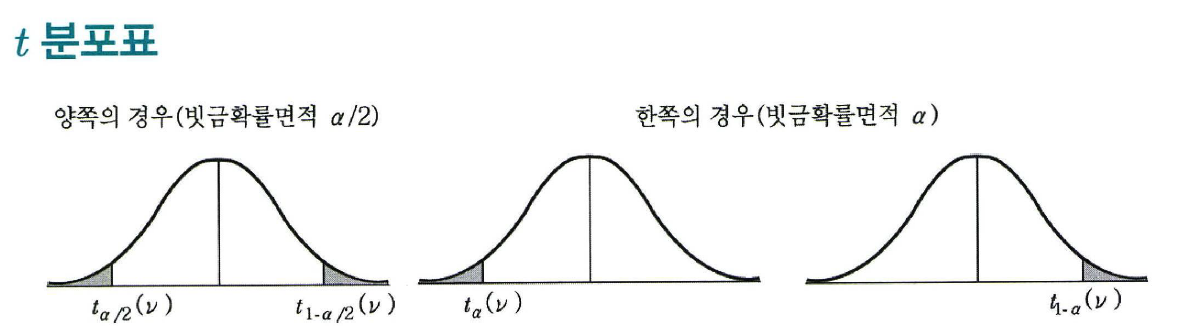

In [76]:
# 규준화식
stats.t.ppf( 1 - 0.05/2, 24)

2.0638985616280205

In [77]:
stats.t.ppf( 0.05/2, 24)

-2.063898561628021

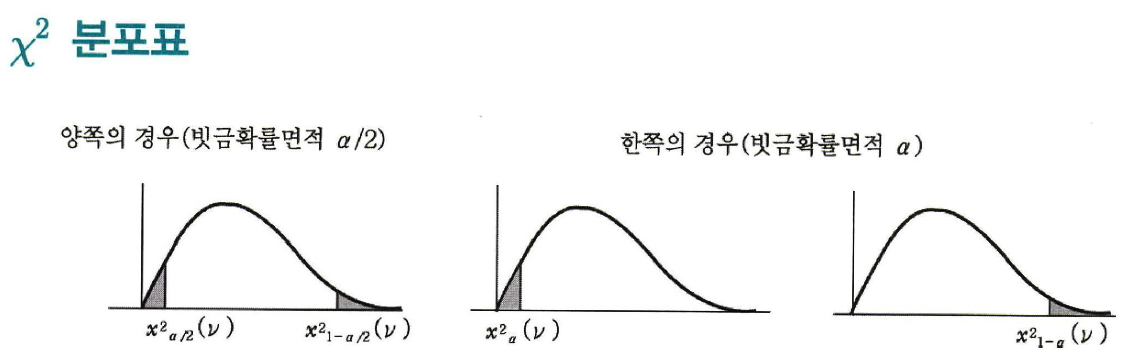

In [78]:
# 규준화식
stats.t.ppf( 1-0.05, 24)

1.7108820799094275

In [79]:
stats.t.ppf( 0.05, 24)

-1.7108820799094282